<a href="https://colab.research.google.com/github/uSarvar/Task_1---Airfare-price-prediction/blob/main/1_task_(Airfare_price_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn   # scikit-learn library
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

firstly, we should check train data:

In [ ]:
train_data = pd.read_csv('/content/train_data.csv')
train_data

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


we can see that train data has got 20000 rows and 12 columns.

and then we can drop useless columns from the train_data:

In [ ]:
train_data.drop(['id','flight'], axis=1, inplace=True)
train_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,AirAsia,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,Vistara,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,Vistara,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   source_city       20000 non-null  object 
 2   departure_time    20000 non-null  object 
 3   stops             20000 non-null  object 
 4   arrival_time      20000 non-null  object 
 5   destination_city  20000 non-null  object 
 6   class             20000 non-null  object 
 7   duration          20000 non-null  float64
 8   days_left         20000 non-null  int64  
 9   price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.5+ MB


the train_data has got no missing values (NaN).

In [ ]:
train_data.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


**`train_test_split`**

In [ ]:
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=33)

the train_set numeric coloumns' histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7b4473a30>,
      dtype=object)

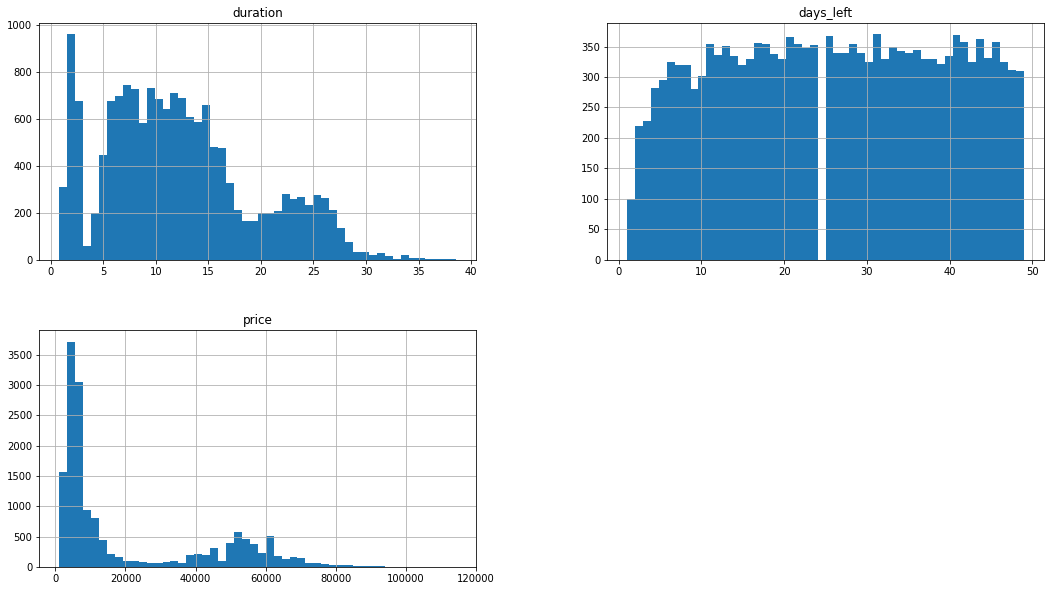

In [ ]:
train_set.hist(bins=50, figsize=(18,10))

we should split these 3 columns to categories one by one:

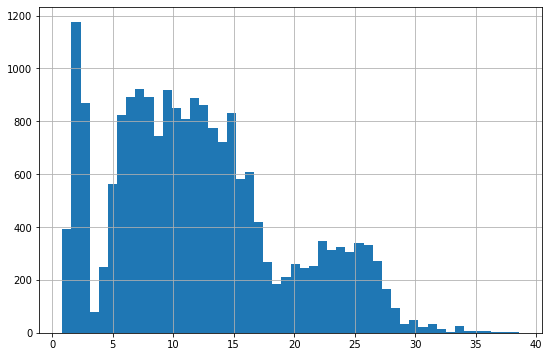

In [ ]:
train_data['duration'].hist(bins=50, figsize=(9,6))

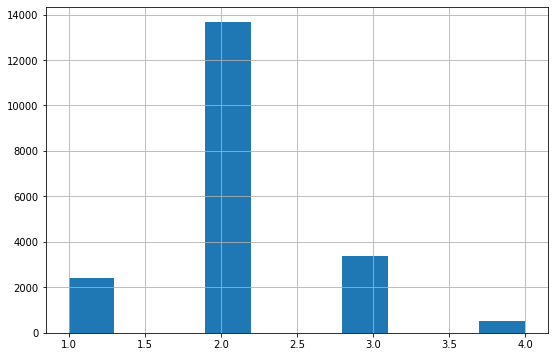

In [ ]:
train_data['duration_cat'] = pd.cut(train_data['duration'], bins=[0., 3.0, 18.0, 27.0, np.inf], labels=[1,2,3,4])
train_data['duration_cat'].hist(figsize=(9,6))

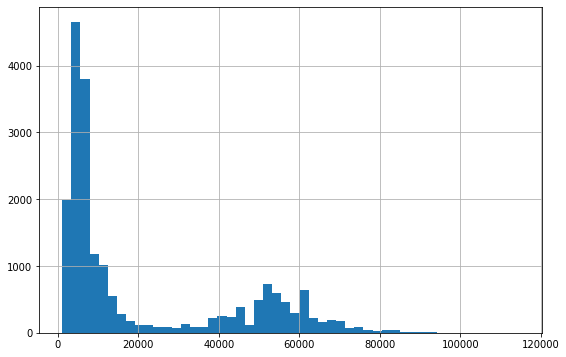

In [ ]:
train_data['price'].hist(bins=50, figsize=(9,6))

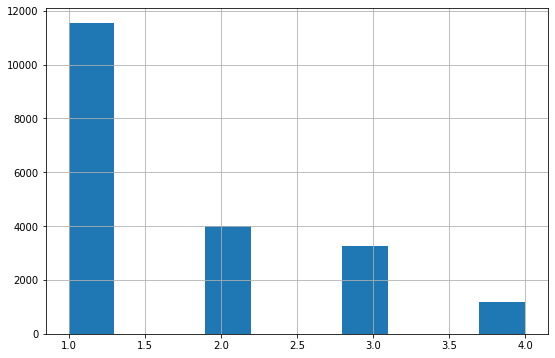

In [ ]:
train_data['price_cat'] = pd.cut(train_data['price'], bins=[0., 10000.0, 47000.0, 62000.0, np.inf], labels=[1,2,3,4])
train_data['price_cat'].hist(figsize=(9,6))

**`StratifiedShuffleSplit()`** function to get balance in columns:

In [ ]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=33)
# stratified_split.split function returns indexes
for train_index1, test_index1 in stratified_split.split(train_data,train_data['duration_cat']):
    strat_train_set = train_data.loc[train_index1]
    strat_test_set = train_data.loc[test_index1]
for train_index2, test_index2 in stratified_split.split(train_data,train_data['price_cat']):
    strat_train_set = train_data.loc[train_index2]
    strat_test_set = train_data.loc[test_index2]

strat_train_set.drop(['duration_cat','price_cat'], axis=1, inplace=True)
strat_test_set.drop(['duration_cat','price_cat'], axis=1, inplace=True)

In [ ]:
pricing = strat_train_set.copy()

**`catplot()`** to see connection between airfare and airplane's class:

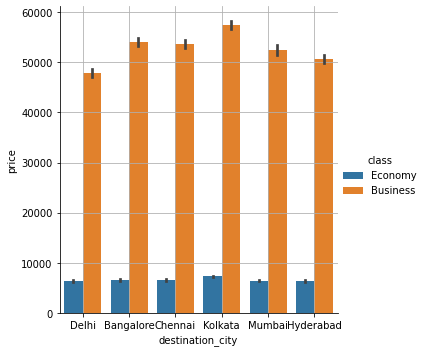

In [ ]:
sns.catplot(data=pricing, kind='bar', x='destination_city', y='price', hue='class')
plt.grid()

correlation between `price` with `duration` and `days_left` columns:

In [ ]:
pricing.corrwith(pricing['price']).sort_values(ascending=False)

price        1.000000
duration     0.206171
days_left   -0.102859
dtype: float64

This time, we separate the label (which we need to predict) column `price`. This is because changes applied to the remaining columns should not affect the label:

In [ ]:
pricing = strat_train_set.drop('price', axis=1)
pricing_labels = strat_train_set['price'].copy()
pricing

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
10381,Vistara,Hyderabad,Morning,one,Evening,Delhi,Economy,8.42,25
3610,Vistara,Mumbai,Night,one,Morning,Bangalore,Business,13.92,14
4320,Vistara,Delhi,Afternoon,two_or_more,Morning,Chennai,Economy,19.50,48
13801,Vistara,Hyderabad,Afternoon,one,Night,Delhi,Economy,7.75,47
2898,GO_FIRST,Delhi,Early_Morning,one,Evening,Kolkata,Economy,10.42,37
...,...,...,...,...,...,...,...,...,...
6249,Air_India,Chennai,Afternoon,one,Afternoon,Mumbai,Economy,26.58,32
13975,Vistara,Mumbai,Evening,one,Morning,Bangalore,Economy,17.25,28
9793,Air_India,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,23
1448,SpiceJet,Delhi,Evening,one,Night,Kolkata,Economy,4.25,19


ML algorithms work with numbers, so we extract the text columns and convert them to numbers by shape substitution:

In [ ]:
pricing_cat = pricing[['airline','source_city','departure_time','stops','arrival_time','destination_city','class']]
pricing_cat.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
10381,Vistara,Hyderabad,Morning,one,Evening,Delhi,Economy
3610,Vistara,Mumbai,Night,one,Morning,Bangalore,Business
4320,Vistara,Delhi,Afternoon,two_or_more,Morning,Chennai,Economy
13801,Vistara,Hyderabad,Afternoon,one,Night,Delhi,Economy
2898,GO_FIRST,Delhi,Early_Morning,one,Evening,Kolkata,Economy


for this we use the **`OneHotEncoder()`** function:

In [ ]:
cat_encoder = OneHotEncoder()
pricing_cat_1hot = cat_encoder.fit_transform(pricing_cat)
pricing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

we extract the numeric columns and balance the values using **`StandardScaler()`**:

In [ ]:
pricing_num = pricing[['duration','days_left']]
pricing_num

,duration,days_left
10381,8.42,25
3610,13.92,14
4320,19.50,48
13801,7.75,47
2898,10.42,37
...,...,...
6249,26.58,32
13975,17.25,28
9793,21.17,23
1448,4.25,19


In [ ]:
standart_scaler = StandardScaler()
standart_scaler.fit_transform(pricing_num)

array([[-0.52579014, -0.06770848],
       [ 0.24245363, -0.87278161],
       [ 1.02187187,  1.61562625],
       ...,
       [ 1.25513861, -0.21408541],
       [-1.10825861, -0.50683928],
       [ 2.49969353, -1.23872395]])

## Pipeline

Now we need to automate the processes. For this, the scikit-learn library has a special concept **"Pipeline"**.
Our data also went through several processes from the starting point before arriving directly at ML. Above, we wrote each process manually, now we combine all the steps to form a **`Pipeline()`**.

let's start by creating a pipeline for the number of columns (num_pipeline):

In [ ]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

to start the pipeline, we call the **`fit_transform()`** method:

In [ ]:
num_pipeline.fit_transform(pricing_num)

array([[-0.52579014, -0.06770848],
       [ 0.24245363, -0.87278161],
       [ 1.02187187,  1.61562625],
       ...,
       [ 1.25513861, -0.21408541],
       [-1.10825861, -0.50683928],
       [ 2.49969353, -1.23872395]])

The pipeline for processing numeric columns is ready, now it's time for text columns. For this, we refer to the special **`ColumnTransformer()`** object. Inside the **`ColumnTransformer()`** we also add the **`num_pipeline()`** we made above.

In [ ]:
num_attrs = list(pricing_num)
cat_attrs = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

The final complete pipeline is ready. Just call the **`fit_transform()`** method to start the pipeline.

In [ ]:
pricing_prepared = full_pipeline.fit_transform(pricing)

# Machine Learning

Our goal is prediction, for which there are several ML algorithms. Now let's use some ready-made algorithms from scikit-learn.

### LinearRegression()

LinearRegression is an estimator. Estimators receive data and learn to fit them using the **`fit()`** method (machine learning)

In [ ]:
LR_model = LinearRegression()
LR_model.fit(pricing_prepared, pricing_labels)

LinearRegression()

DONE! Machine Learning is over! We have just taught a computer to predict the price of an airline ticket.

Let's check how the model works. Let's feed a row from the test dataset to the model and compare the result with the existing result (label).

In [ ]:
# we randomly select 5 rows
test_data = pricing.sample(5)
test_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
2736,Indigo,Hyderabad,Night,zero,Late_Night,Chennai,Economy,1.25,28
6861,Vistara,Hyderabad,Night,zero,Night,Mumbai,Economy,1.42,8
19351,Air_India,Hyderabad,Night,one,Morning,Delhi,Economy,12.92,44
13131,GO_FIRST,Chennai,Afternoon,one,Late_Night,Delhi,Economy,11.08,16
17331,Vistara,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,5.50,18


In [ ]:
# We extract the prices corresponding to the above lines (we need to predict exactly these values).
test_label = pricing_labels.loc[test_data.index]
test_label

2736     1788
6861     4453
19351    4387
13131    4827
17331    7575
Name: price, dtype: int64

We can pass the test_data through the pipeline and make it the view we need. We called the **`fit()`** method before, now we use the **`transform()`** method:

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

<5x37 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

We predict:

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([-2206.65088589,  2960.87519873,    44.37931744,  7101.70338094,
        9212.78190347])

Above predicted values. Now let's compare how they differ from real values:

In [ ]:
pd.DataFrame({'Prediction':predicted_data, 'Real price': test_label})

,Prediction,Real price
2736,-2206.650886,1788
6861,2960.875199,4453
19351,44.379317,4387
13131,7101.703381,4827
17331,9212.781903,7575


## Evaluation of the model:

Our model predicted with less error in some places, and more in some places. But 5 lines are not enough to evaluate the accuracy of the model. Therefore, let's test it using the test set we extracted earlier:

First we extract the predictor columns, all columns except **`price`**:

In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
8537,Air_India,Delhi,Morning,one,Afternoon,Kolkata,Economy,28.17,45
2077,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,16.00,13
6433,Air_India,Bangalore,Early_Morning,one,Evening,Chennai,Economy,9.50,4
9274,Vistara,Hyderabad,Night,one,Night,Kolkata,Economy,26.17,4
5940,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Business,2.25,6
...,...,...,...,...,...,...,...,...,...
2829,Air_India,Bangalore,Night,one,Evening,Mumbai,Economy,21.00,12
11871,Vistara,Chennai,Morning,one,Afternoon,Delhi,Economy,4.75,35
4378,GO_FIRST,Delhi,Morning,one,Night,Mumbai,Economy,9.33,47
13555,Air_India,Delhi,Evening,one,Morning,Bangalore,Economy,17.33,1


We separate the label **`price`** column.

In [ ]:
y_test = test_set['price'].copy()
y_test

8537      4385
2077     59033
6433     12949
9274     10069
5940     34472
         ...  
2829      9277
11871     5206
4378      5087
13555    11310
17440     9840
Name: price, Length: 4000, dtype: int64

We also pass **`X_test`** through the pipeline:

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

Prediction:

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

We use the Root Mean Square Error (RMSE) to compare the forecast and real data:

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6463.105242696509


Since there is no universal exact solution to improve model accuracy, we also try other models.

### DecisionTree()

In [ ]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(pricing_prepared, pricing_labels)

DecisionTreeRegressor()

Let's check the model:

In [ ]:
y_predicted = Tree_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2282.814231984285


This model performed much better than the **`LinearRegression()`** model

### RandomForest()

In [ ]:
RF_model = RandomForestRegressor()
RF_model.fit(pricing_prepared, pricing_labels)

RandomForestRegressor()

We will also check this model:

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2272.260112028117


## Evaluation by the method of Cross-Validation

Above, we divided the data into test and train sets to evaluate the model. The disadvantage of this method is that we always use the same data for testing and training. With cross-validation, we can divide the data into several parts and train and test the model several times using different parts. For cross validation, it is not necessary to divide the data into train and test, it is done by sklearn itself.

In [ ]:
X = train_data.drop('price', axis=1)
y = train_data['price'].copy()

X_prepared = full_pipeline.transform(X)

We can create a simple function to display the validation results:

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

### LogisticRegression

In [ ]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [6753.83447787 6729.41150805 6676.00809885 6361.75789989 6727.57641467
 6736.0469657  6923.49197428 6539.54275391 6716.57922509 6994.14758426]
Mean: 6715.839690255986
Std: 167.56797556585823


### DecisionTree

In [ ]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [4715.16911762 4705.7779633  5272.34547489 4712.11720002 4734.56377489
 4817.07714068 5104.1490716  5024.35230425 4759.24077178 5272.25878467]
Mean: 4911.70516037016
Std: 222.31308852748305


### RandomForest

In [ ]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [3554.74118816 3863.49235332 4022.83560394 3459.7097389  3600.55840154
 3703.48569509 4060.67900022 3755.42473071 3695.61109363 3823.55444679]
Mean: 3754.0092252307977
Std: 184.11114361529422


## Submission

we check the data given for the test:

In [ ]:
test_data = pd.read_csv('/content/test_data.csv')
test_data

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,4997,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,4998,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,4999,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


We remove 2 columns which are unnecessary for ML:

In [ ]:
test_data.drop(columns=['id','flight'], inplace=True)
test_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


**`full_pipeline`**:

In [ ]:
sub = full_pipeline.transform(test_data)

we chose RF_model for prediction:

In [ ]:
sub_pred = LR_model.predict(sub)
sub_pred

array([55843.26778997, 53644.82617177, 40910.51928137, ...,
       51390.3909236 , 48841.97158551, 51560.78827188])

and again we also output the given table to accommodate the predicted values:

In [ ]:
sample = pd.read_csv('/content/sample_solution.csv')
sample

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


Finally, the result is ready!

In [ ]:
sample['price'] = sub_pred
sample

,id,price
0,1,55843.267790
1,2,53644.826172
2,3,40910.519281
3,4,2464.785389
4,5,5738.669814
...,...,...
4995,4996,53435.938487
4996,4997,-958.415374
4997,4998,51390.390924
4998,4999,48841.971586


In [ ]:
sample.to_csv('submission(LR).csv', index=False)

**The End**